In [0]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00482/dataset.zip

--2020-04-09 19:52:36--  http://archive.ics.uci.edu/ml/machine-learning-databases/00482/dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240539 (235K) [application/x-httpd-php]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>] 234.90K   742KB/s    in 0.3s    

2020-04-09 19:52:37 (742 KB/s) - ‘dataset.zip’ saved [240539/240539]



In [0]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: dataset.csv             


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [0]:
data=pd.read_csv('dataset.csv')

In [0]:
data.isnull().sum()

SystemCodeNumber    0
Capacity            0
Occupancy           0
LastUpdated         0
dtype: int64

In [0]:
data.columns

Index(['SystemCodeNumber', 'Capacity', 'Occupancy', 'LastUpdated'], dtype='object')

In [0]:
print(data.head)

<bound method NDFrame.head of       SystemCodeNumber  Capacity  Occupancy          LastUpdated
0          BHMBCCMKT01       577         61  2016-10-04 07:59:42
1          BHMBCCMKT01       577         64  2016-10-04 08:25:42
2          BHMBCCMKT01       577         80  2016-10-04 08:59:42
3          BHMBCCMKT01       577        107  2016-10-04 09:32:46
4          BHMBCCMKT01       577        150  2016-10-04 09:59:48
...                ...       ...        ...                  ...
35712         Shopping      1920       1517  2016-12-19 14:30:33
35713         Shopping      1920       1487  2016-12-19 15:03:34
35714         Shopping      1920       1432  2016-12-19 15:29:33
35715         Shopping      1920       1321  2016-12-19 16:03:35
35716         Shopping      1920       1180  2016-12-19 16:30:35

[35717 rows x 4 columns]>


In [0]:
data_arr=data.values[:,:3]

In [0]:
data_arr.shape

(35717, 3)

In [0]:
np.unique(data_arr[:,0])

array(['BHMBCCMKT01', 'BHMBCCPST01', 'BHMBCCSNH01', 'BHMBCCTHL01',
       'BHMBRCBRG01', 'BHMBRCBRG02', 'BHMBRCBRG03', 'BHMBRTARC01',
       'BHMEURBRD01', 'BHMEURBRD02', 'BHMMBMMBX01', 'BHMNCPHST01',
       'BHMNCPLDH01', 'BHMNCPNHS01', 'BHMNCPNST01', 'BHMNCPPLS01',
       'BHMNCPRAN01', 'Broad Street', 'Bull Ring', 'NIA Car Parks',
       'NIA North', 'NIA South', 'Others-CCCPS105a', 'Others-CCCPS119a',
       'Others-CCCPS133', 'Others-CCCPS135a', 'Others-CCCPS202',
       'Others-CCCPS8', 'Others-CCCPS98', 'Shopping'], dtype=object)

In [0]:
data_arr

array([['BHMBCCMKT01', 577, 61],
       ['BHMBCCMKT01', 577, 64],
       ['BHMBCCMKT01', 577, 80],
       ...,
       ['Shopping', 1920, 1432],
       ['Shopping', 1920, 1321],
       ['Shopping', 1920, 1180]], dtype=object)

In [0]:
le=LabelEncoder()

In [0]:
data_arr[:,0]=le.fit_transform(data_arr[:,0])

In [0]:
len(le.classes_)

30

#### Clustering

In [0]:
data_arr

array([[0, 577, 61],
       [0, 577, 64],
       [0, 577, 80],
       ...,
       [29, 1920, 1432],
       [29, 1920, 1321],
       [29, 1920, 1180]], dtype=object)

In [0]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [0]:
sc=StandardScaler()
data_arr=sc.fit_transform(data_arr)
print(np.mean(data_arr,axis=0) , np.std(data_arr,axis=0))

[-2.54639164e-17  0.00000000e+00  2.54639164e-17] [1. 1. 1.]


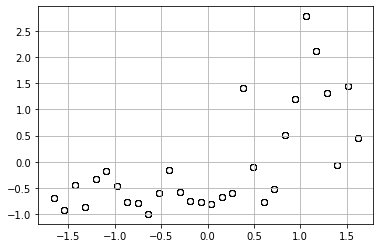

In [0]:
plt.scatter(data_arr[:,0],data_arr[:,1],c='white',edgecolor='black',marker='o')
plt.grid()
plt.show()

In [0]:
km=KMeans(n_clusters=5,init='random',n_init=10,max_iter=300,random_state=0)

In [0]:
x_pred=km.fit_predict(data_arr)

In [0]:
center=km.cluster_centers_

In [0]:
center

array([[ 0.01653545, -0.55959892, -0.44830872],
       [ 1.0113663 ,  2.29230944,  3.2376056 ],
       [ 1.15615641,  1.34127726,  0.92256746],
       [-1.18230184, -0.63984964, -0.46673944],
       [ 1.17819358,  0.67785619,  0.00493525]])

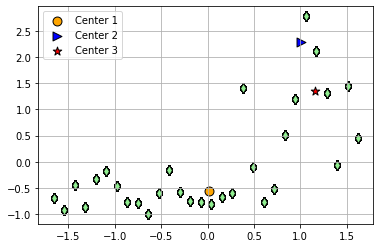

In [0]:
plt.figure()
plt.scatter(data_arr[:,0],data_arr[:,1],s=50,c='lightgreen',marker='d',edgecolor='black')
plt.scatter(center[0,0],center[0,1],s=80,c='orange',marker='o',edgecolor='black',label='Center 1')
plt.scatter(center[1,0],center[1,1],s=80,c='blue',marker='>',edgecolor='black',label='Center 2')
plt.scatter(center[2,0],center[2,1],s=80,c='red',marker='*',edgecolor='black',label='Center 3')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [0]:
print("Distortion={}".format(km.inertia_))

Distortion=15812.123579758858


In [0]:
from sklearn.cluster import AgglomerativeClustering

In [0]:
ac=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')

In [0]:
x_pred=ac.fit_predict(data_arr)

In [0]:
x_pred

array([2, 2, 2, ..., 1, 1, 1])

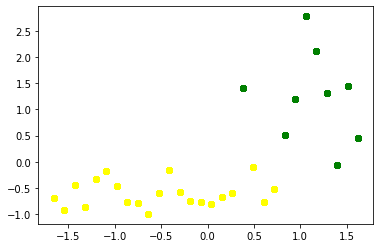

In [0]:
plt.scatter(data_arr[x_pred==0,0],data_arr[x_pred==0,1],c='red')
plt.scatter(data_arr[x_pred==1,0],data_arr[x_pred==1,1],c='green')
plt.scatter(data_arr[x_pred==2,0],data_arr[x_pred==2,1],c='yellow')
plt.show()

Regression algorithms

In [0]:
data_arr.shape

(35717, 3)

In [0]:
x=data_arr[:,:2]
y=data_arr[:,2]

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [0]:
reg=LinearRegression()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [0]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print("Training accuracy = {}\nTesting Accuracy = {}".format(reg.score(X_train,y_train),reg.score(X_test,y_test)))

Training accuracy = 0.6059384953049758
Testing Accuracy = 0.6034211165754159


Polynomial Regression

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [0]:
poly=PolynomialFeatures(degree=3)

In [0]:
x_train_poly=poly.fit_transform(X_train)
x_test_poly=poly.fit_transform(X_test)

In [0]:
linear=LinearRegression()

In [0]:
linear.fit(x_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
linear.score(x_train_poly,y_train)

0.6331881662684069

In [0]:
print("Training accuracy = {}\nTesting Accuracy = {}".format(linear.score(x_train_poly,y_train),linear.score(x_test_poly,y_test)))

Training accuracy = 0.6331881662684069
Testing Accuracy = 0.6324898204809885


Random Forest Regression

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [0]:
forest=RandomForestRegressor(n_estimators=1000,criterion='mse',random_state=1,n_jobs=1)

In [0]:
forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [0]:
y_train_pred=forest.predict(X_train)
y_test_pred=forest.predict(X_test)

In [0]:
print("train mean squread error={}\ntest mean squared error={}".format(mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))

train mean squread error=0.2661396677601386
test mean squared error=0.2673312392364412


In [0]:
len(set(list(data_arr[:,2])))

3013